<a href="https://colab.research.google.com/github/dezzygc/WineData/blob/main/wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/ready_wine.csv"

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(path)

In [6]:
#removed fixed acidity due to high correlation
# making new df with only feature variables
x1 = df.iloc[:,1:11]

# new df with only target variable (quality)
y = df[['quality2']]

In [79]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = x1
X = StandardScaler().fit_transform(x1)

array([[ 0.96187667, -1.39147228, -0.45321841, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [ 1.96744245, -1.39147228,  0.04341614, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [ 1.29706527, -1.18607043, -0.16942723, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-0.09955388, -0.72391627, -0.16942723, ...,  0.70550789,
         0.54204194,  0.54162988],
       [ 0.65462046, -0.77526673, -0.38227061, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.21684919,  1.02199944,  0.75289408, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [134]:
#splitting dataframe into test and training sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# **`Decision tree classifier`**

In [81]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
# lower accuracy for low and high quality wines...

              precision    recall  f1-score   support

           1       0.15      0.12      0.14        16
           2       0.91      0.86      0.88       339
           3       0.39      0.58      0.46        45

    accuracy                           0.80       400
   macro avg       0.48      0.52      0.49       400
weighted avg       0.82      0.80      0.80       400



In [105]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

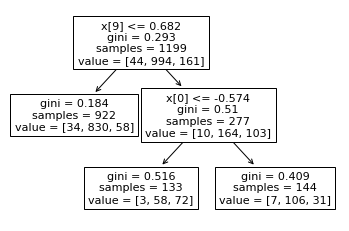

In [106]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

Macro average = averaging the total true positives, false negatives and false positives, corresponds to accuracy.

precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in y_true.

# **Random Forest classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
#best overall accuracy but performs very poorly for low quality wines

<ipython-input-27-c4fd206e443f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train, y_train)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.91      0.96      0.93       339
           3       0.66      0.60      0.63        45

    accuracy                           0.88       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.84      0.88      0.86       400



# **Boosting alogrithms**

In [ ]:
#AdaBoost classifiers
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.16      0.19      0.17        16
           2       0.91      0.83      0.87       339
           3       0.39      0.62      0.48        45

    accuracy                           0.78       400
   macro avg       0.49      0.55      0.51       400
weighted avg       0.82      0.78      0.80       400



In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.90      0.93      0.91       339
           3       0.57      0.53      0.55        45

    accuracy                           0.85       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.82      0.85      0.84       400



In [91]:
path = "/content/drive/MyDrive/Colab Notebooks/ready_wine2.csv"

In [ ]:
dfnew = pd.read_csv(path)
ynew = dfnew[['quality3']]
xnew = dfnew.iloc[:,1:11]

In [ ]:
from sklearn.preprocessing import StandardScaler
X_features = xnew
Xnew = StandardScaler().fit_transform(xnew)

In [97]:
#splitting dataframe into test and training sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Xnew,ynew,test_size=0.25,random_state=0)

In [98]:
#XG Boost classifier
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print(classification_report(y_test, y_pred5))
#better at classifying low and high quality than previous models

              precision    recall  f1-score   support

           0       0.40      0.11      0.17        19
           1       0.88      0.94      0.91       325
           2       0.65      0.59      0.62        56

    accuracy                           0.85       400
   macro avg       0.64      0.54      0.56       400
weighted avg       0.83      0.85      0.83       400



<AxesSubplot:>

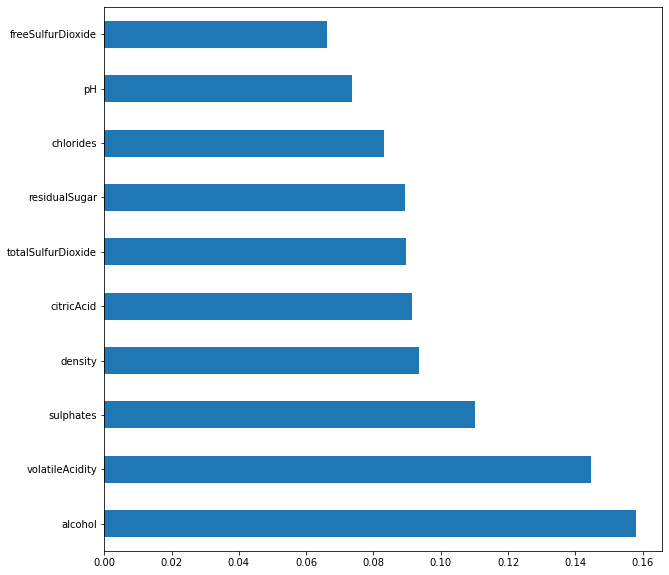

In [99]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

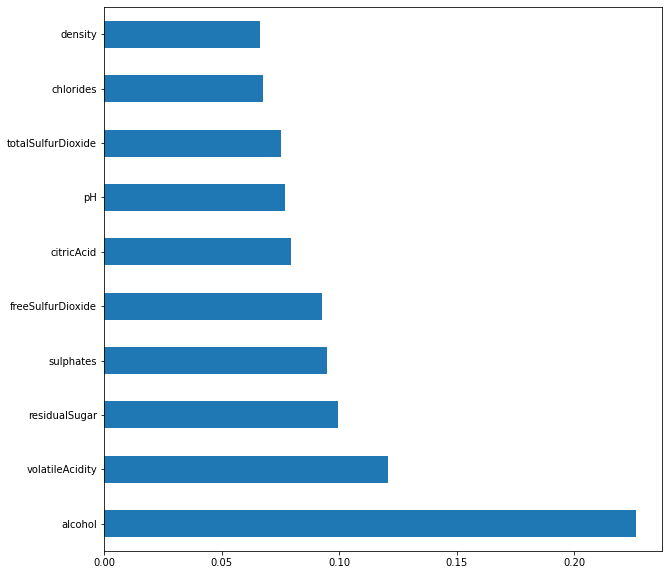

In [100]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# **Normalization requirement**

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# making new df with only feature variables
X = df.iloc[:,1:11]

# new df with only target variable (quality)
#y = df[['quality2']]
#y = y.iloc[[:, 1]]

scaler = StandardScaler().set_output(transform="pandas")

In [ ]:
#y = y['quality2']
y

In [23]:
#splitting dataframe into test and training sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42
)

scaled_X_train = scaler.fit_transform(x_train) 

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

class_names = print(X.keys())

In [52]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[  0  16   0]
 [  0 339   0]
 [  0  45   0]]
Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


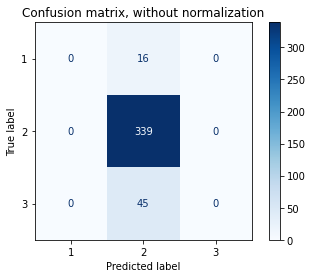

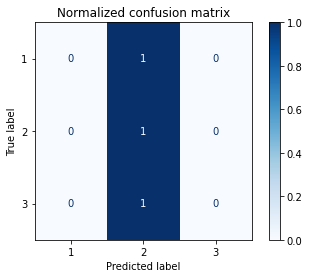

In [50]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#**Support Vector Machine Classifier**




In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see the impact on the results

model7 = svm.SVC(kernel="linear", C=0.01)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
print(classification_report(y_test, y_pred7))

np.set_printoptions(precision=2)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.85      1.00      0.92       339
           3       0.00      0.00      0.00        45

    accuracy                           0.85       400
   macro avg       0.28      0.33      0.31       400
weighted avg       0.72      0.85      0.78       400



In [ ]:
class1 = 1599 / (3 * 63)
class2 = 1599 / (3 * 1319)
class3 = 1599 / (3 * 217)


In [60]:
class_weight = {1: 8.5,
                2: 0.40,
                3: 2.5}


wj=n_samples / (n_classes * n_samplesj)

wj is the weight for each class(j signifies the class)

n_samplesis the total number of samples or rows in the dataset

n_classesis the total number of unique classes in the target

n_samplesjis the total number of rows of the respective class


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model7 = svm.SVC(kernel="linear", C=100.0, class_weight=class_weight)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
print(classification_report(y_test, y_pred7))

#np.set_printoptions(precision=2)

              precision    recall  f1-score   support

           1       0.08      0.50      0.14        16
           2       0.96      0.46      0.62       339
           3       0.28      0.87      0.42        45

    accuracy                           0.51       400
   macro avg       0.44      0.61      0.39       400
weighted avg       0.85      0.51      0.58       400



In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model7 = svm.SVC(kernel="linear", C=10.0, class_weight=class_weight)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
print(classification_report(y_test, y_pred7))

np.set_printoptions(precision=2)

              precision    recall  f1-score   support

           1       0.09      0.50      0.15        16
           2       0.96      0.47      0.63       339
           3       0.28      0.87      0.42        45

    accuracy                           0.52       400
   macro avg       0.44      0.61      0.40       400
weighted avg       0.85      0.52      0.59       400

